### Face Generation GAN for Synthetic Data Creation

Recently, I read about a group working on developing a neural network to discriminate between different types of faces, thereby being able to tell different people apart (associating a speicific face with a specific name for example).  In the example of a model that learns faces and their associated names, a large amount of labeled data would be needed.  While databases like the one described are available, such as the *Labeled Faces in the Wild (LFW)* dataset, they contain a relatively small amount of images, 13,000 in the case of LFW.  

More data is always a good thing, and given the remarkable ability of GANs to generate synthetic images, there may be an opportunity to use GANs to generate detailed synthetic faces, which could be used in training the classifier neural network. Obviously, these synthetic images would not be generated with names.  However, the purpose of the image/name pairs is to see how well the classifier can remember image name pairs.  Therefore, the actual names do not matter, what matters is the names associated with the respective images are unique.  To circumvent this issue, one could easily generate random "names" (ie hexadecimal values), one unique name for each unique image, and this could work just as well.  The situation in which random hexadecimal names wouldn't work, would be if the network was also being trained to associate certain names with certain types of faces as well, such as feminine names with female faces.

In this project, I train a GAN on the **celeba dataset**, to find if it would be feasible to generate synthetic faces realistic enough to use in the training of facial recognition models.  In the spirit of [DCGAN](https://arxiv.org/pdf/1511.06434.pdf), I use convolutional layers in the discriminator and generator to build a deeper and more powerful network.  

In order to create as realistic images as possible, I train the GAN on higher resolution images of 56x56, twice the generally used resolution of 28x28.  The model uses leaky ReLUs, batch normalization, Adam Optimizer, batch size of _, learning rate of _, and these other hyperparameters...

The model was written in Python using Tensorflow.

Below is the target of what I would like the synthetic images to look like.

In [9]:
import tensorflow as tf
import os
from glob import glob
from matplotlib import pyplot as plt
%matplotlib inline

data_dir = './data'

import helper

helper.download_extract('celeba', data_dir)

Found celeba Data


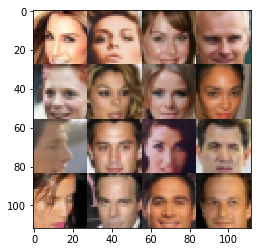

In [13]:
show_n_images = 16

face_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
plt.imshow(helper.images_square_grid(face_images, 'RGB'))

The celeba images will be of the resolution 28x28, and cropped down just to show the faces.  Each image will have 3 color channels (RGB), and will be in the range of -.5 to .5.  

#### Set-up model inputs